In [24]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv("ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [26]:
df1 = pd.read_csv("movies.csv")
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
df2 = pd.merge(df, df1, on='movieId')
df2.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [28]:
df2.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [29]:
ratings = pd.DataFrame(df2.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [30]:
ratings['number_of_ratings'] = df2.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


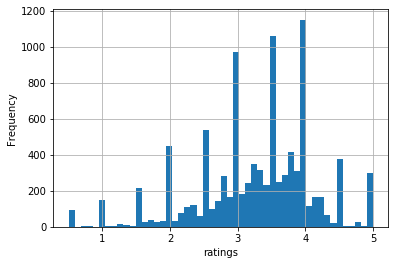

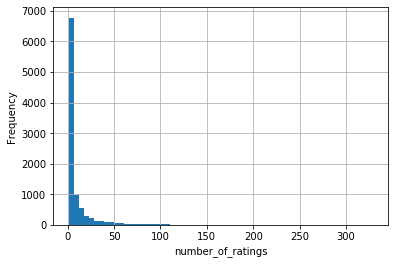

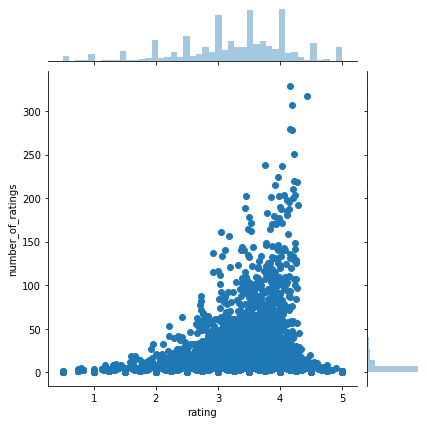

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.show()
ratings['number_of_ratings'].hist(bins=60)
plt.xlabel('number_of_ratings')
plt.ylabel('Frequency')
plt.show()
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [32]:
movie_matrix = df2.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [34]:
SR_user_rating = movie_matrix['Shawshank Redemption, The (1994)']
SOL_user_rating = movie_matrix['Silence of the Lambs, The (1991)']

In [35]:
similar_to_SR = movie_matrix.corrwith(SR_user_rating)
similar_to_SR.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [36]:
similar_to_SOL = movie_matrix.corrwith(SOL_user_rating)
similar_to_SOL.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [37]:
corr_SOL = pd.DataFrame(similar_to_SOL, columns=['Correlation'])
corr_SOL.dropna(inplace=True)
corr_SOL.head()

,Correlation
title,
"'burbs, The (1989)",0.249828
(500) Days of Summer (2009),0.281856
*batteries not included (1987),0.178542
...And Justice for All (1979),0.188982
10 Cloverfield Lane (2016),0.000000


In [38]:
corr_SR = pd.DataFrame(similar_to_SR, columns=['correlation'])
corr_SR.dropna(inplace=True)
corr_SR.head()

,correlation
title,
"'burbs, The (1989)",0.419543
(500) Days of Summer (2009),0.249580
*batteries not included (1987),0.404520
...And Justice for All (1979),-1.000000
10 Cloverfield Lane (2016),0.145671


In [39]:
corr_SR = corr_SR.join(ratings['number_of_ratings'])
corr_SOL = corr_SOL.join(ratings['number_of_ratings'])

In [40]:
corr_SR[corr_SR['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Four Weddings and a Funeral (1994),0.446212,103
Schindler's List (1993),0.402202,220
"Usual Suspects, The (1995)",0.394294,204
Ocean's Eleven (2001),0.391546,119
"Green Mile, The (1999)",0.382818,111
Inception (2010),0.377839,143
Catch Me If You Can (2002),0.356612,115
One Flew Over the Cuckoo's Nest (1975),0.354215,133


In [41]:
corr_SOL[corr_SOL['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
"Silence of the Lambs, The (1991)",1.000000,279
Memento (2000),0.536660,159
Aliens (1986),0.492863,126
Shrek (2001),0.440900,170
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",0.437687,120
"Big Lebowski, The (1998)",0.431846,106
Groundhog Day (1993),0.430134,143
American History X (1998),0.420858,129
Minority Report (2002),0.416317,120
